<a href="https://colab.research.google.com/github/metxico/METXico_Systematic_CODE/blob/main/SimpleHeatMap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving HeatmapBiofilm.csv to HeatmapBiofilm (1).csv


In [ ]:
data = pd.read_csv(list(uploaded.keys())[0])

In [ ]:
print("Primeras filas del archivo:")
print(data.head())

Primeras filas del archivo:
        Feature  AC3_batch8  AC2_batch8  BPIR3_batch8
0  329.20_23.95           1           2             3
1  504.28_25.54           1           2             3
2  487.25_25.53           1           2             3
3  413.40_28.62           1           2             3
4  301.16_21.41           1           2             3


In [ ]:
data_numeric = data.apply(pd.to_numeric, errors='coerce')

In [ ]:
print("\nRevisión de valores NaN por columna:")
print(data_numeric.isna().sum())


Revisión de valores NaN por columna:
Feature         594
AC3_batch8        0
AC2_batch8        0
BPIR3_batch8      0
dtype: int64


In [ ]:
print("\nNúmero de columnas completamente vacías:", (data_numeric.isna().sum(axis=0) == len(data_numeric)).sum())


Número de columnas completamente vacías: 1


In [ ]:
data_numeric = data_numeric.dropna(axis=1, how='all')

In [ ]:
print("\nRevisión de valores NaN por fila:")
print(data_numeric.isna().sum(axis=1))


Revisión de valores NaN por fila:
0      0
1      0
2      0
3      0
4      0
      ..
589    0
590    0
591    0
592    0
593    0
Length: 594, dtype: int64


In [ ]:
data_numeric = data_numeric.dropna(axis=0, how='any')

In [ ]:
print("\nTamaño del conjunto de datos después de la limpieza:", data_numeric.shape)


Tamaño del conjunto de datos después de la limpieza: (594, 3)


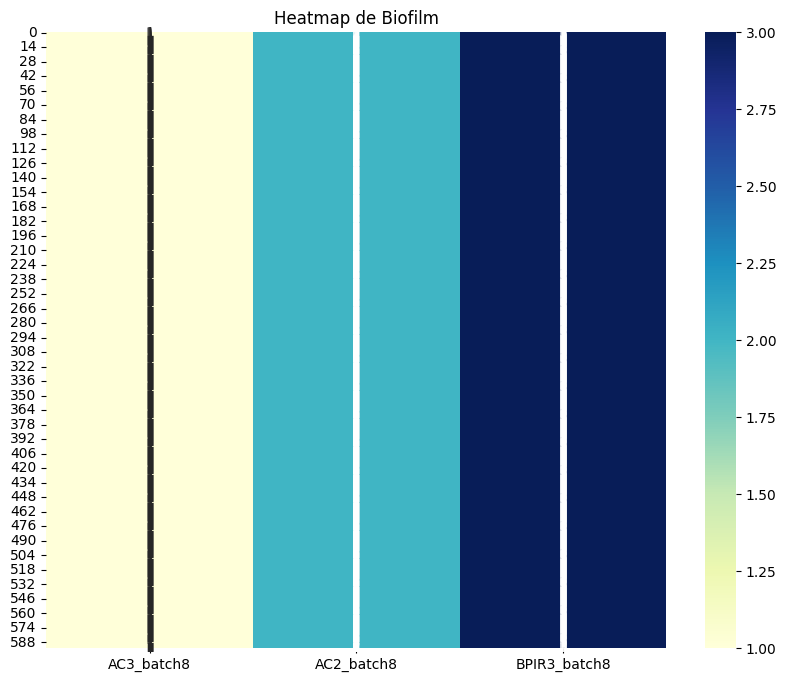

In [ ]:
if not data_numeric.empty:
    plt.figure(figsize=(10,8))
    sns.heatmap(data_numeric, cmap="YlGnBu", annot=True)
    plt.title('outputNameofHeatmap')
    plt.show()
else:
    print("No hay suficientes datos numéricos para generar el heatmap.")